<a href="https://colab.research.google.com/github/Emio-eng/fraud-detection/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#### **Tópicos Avançados em Engenharia de Software**
*by [Victor Ferreira](victor.santos@upe.br)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss
from sklearn import tree

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

In [ ]:
# Mostrar quantidade das colunas e linhas do DataFrame
df.shape

(284807, 31)

In [ ]:
# Separar os dados para teste
test = df.sample(frac=0.15, random_state=0)

In [ ]:
# Remover os dados de teste do DataFrame
df = df.drop(test.index)

In [ ]:
# Mostrar quantidade das colunas e linhas do DataFrame de testes
test.shape

(42721, 31)

In [ ]:
# Mostrar quantidade das colunas e linhas do DataFrame após separar uma parte para testes
df.shape

(242086, 31)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

In [ ]:
# 5 primeiras entradas do DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
# Porcentagem de valores ausentes
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'Coluna': df.columns, '% valores ausentes': percent_missing})
missing_values

,Coluna,% valores ausentes
Time,Time,0.0
V1,V1,0.0
V2,V2,0.0
V3,V3,0.0
V4,V4,0.0
V5,V5,0.0
V6,V6,0.0
V7,V7,0.0
V8,V8,0.0
V9,V9,0.0


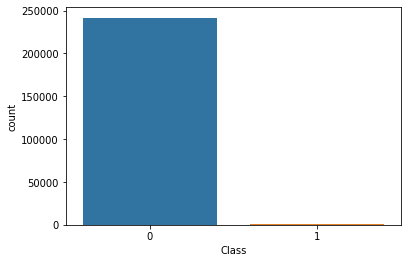

In [ ]:
# Gráfico de barras dos dados
sns.countplot(x="Class", data=df)

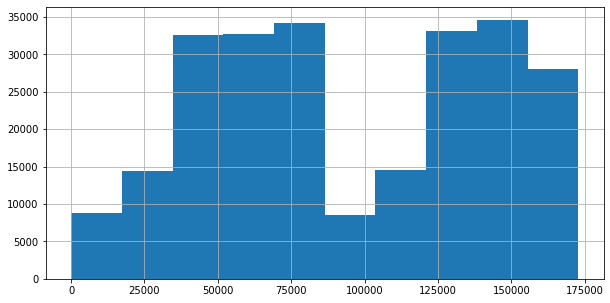

In [ ]:
# Histograma da variável Time no caso de não fraude
df.Time[df.Class == 0].hist(figsize=(10,5))

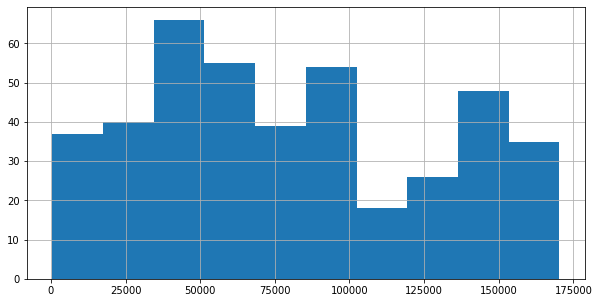

In [ ]:
# Histograma da variável Time no caso de fraude
df.Time[df.Class == 1].hist(figsize=(10,5))

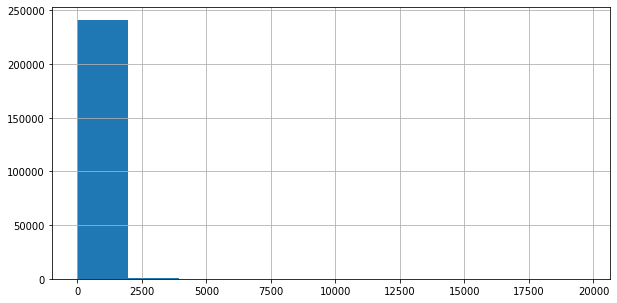

In [ ]:
# Histograma da variável Amount no caso de não fraude
df.Amount[df.Class == 0].hist(figsize=(10,5))

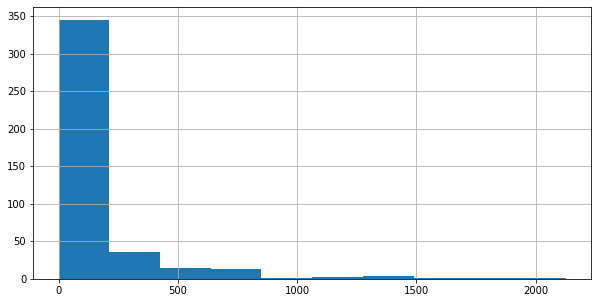

In [ ]:
# Histograma da variável Amount no caso de fraude
df.Amount[df.Class == 1].hist(figsize=(10,5))

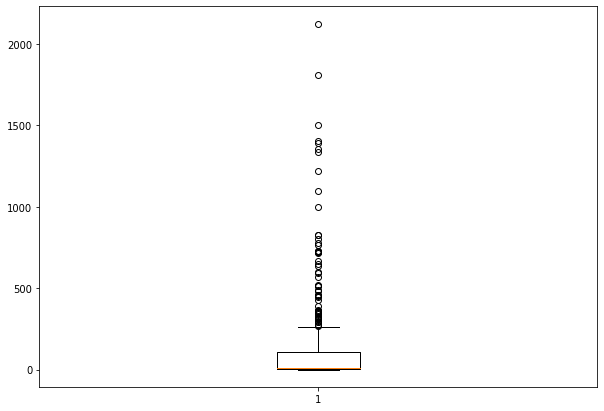

In [ ]:
# Boxplot para a variável Amount no caso de fraude
fig = plt.figure(figsize=(10, 7))

plt.boxplot(df.Amount[df.Class == 1])

plt.show()

In [ ]:
# Removendo outliers referente a variável Amount
df = df.loc[(df['Amount'] < 1500)]

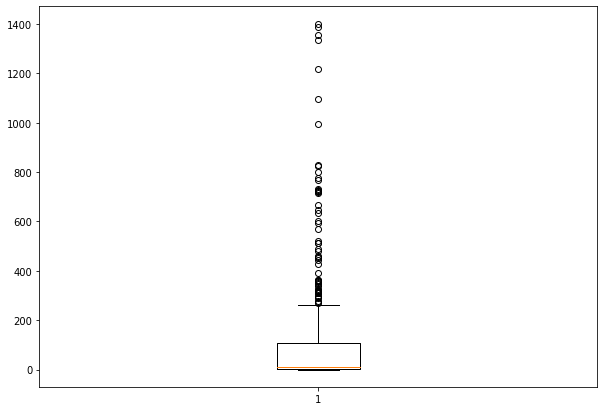

In [ ]:
# Boxplot para a variável Amount no caso de fraude (com outliers removidos)
fig = plt.figure(figsize=(10, 7))

plt.boxplot(df.Amount[df.Class == 1])

plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


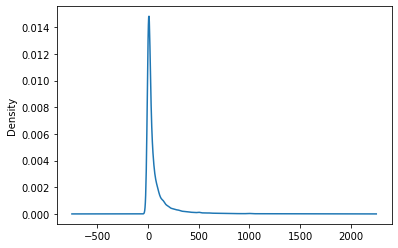

In [ ]:
# Gráfico de densidade da varíavel Amount
print(df['Amount'].plot(kind = 'density'))

AxesSubplot(0.125,0.125;0.775x0.755)


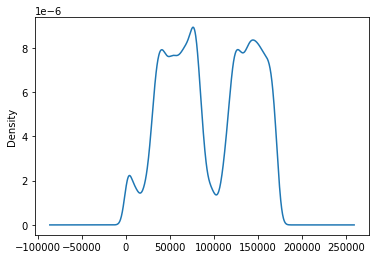

In [ ]:
# Gráfico de densidade da varíavel Time
print(df['Time'].plot(kind = 'density'))

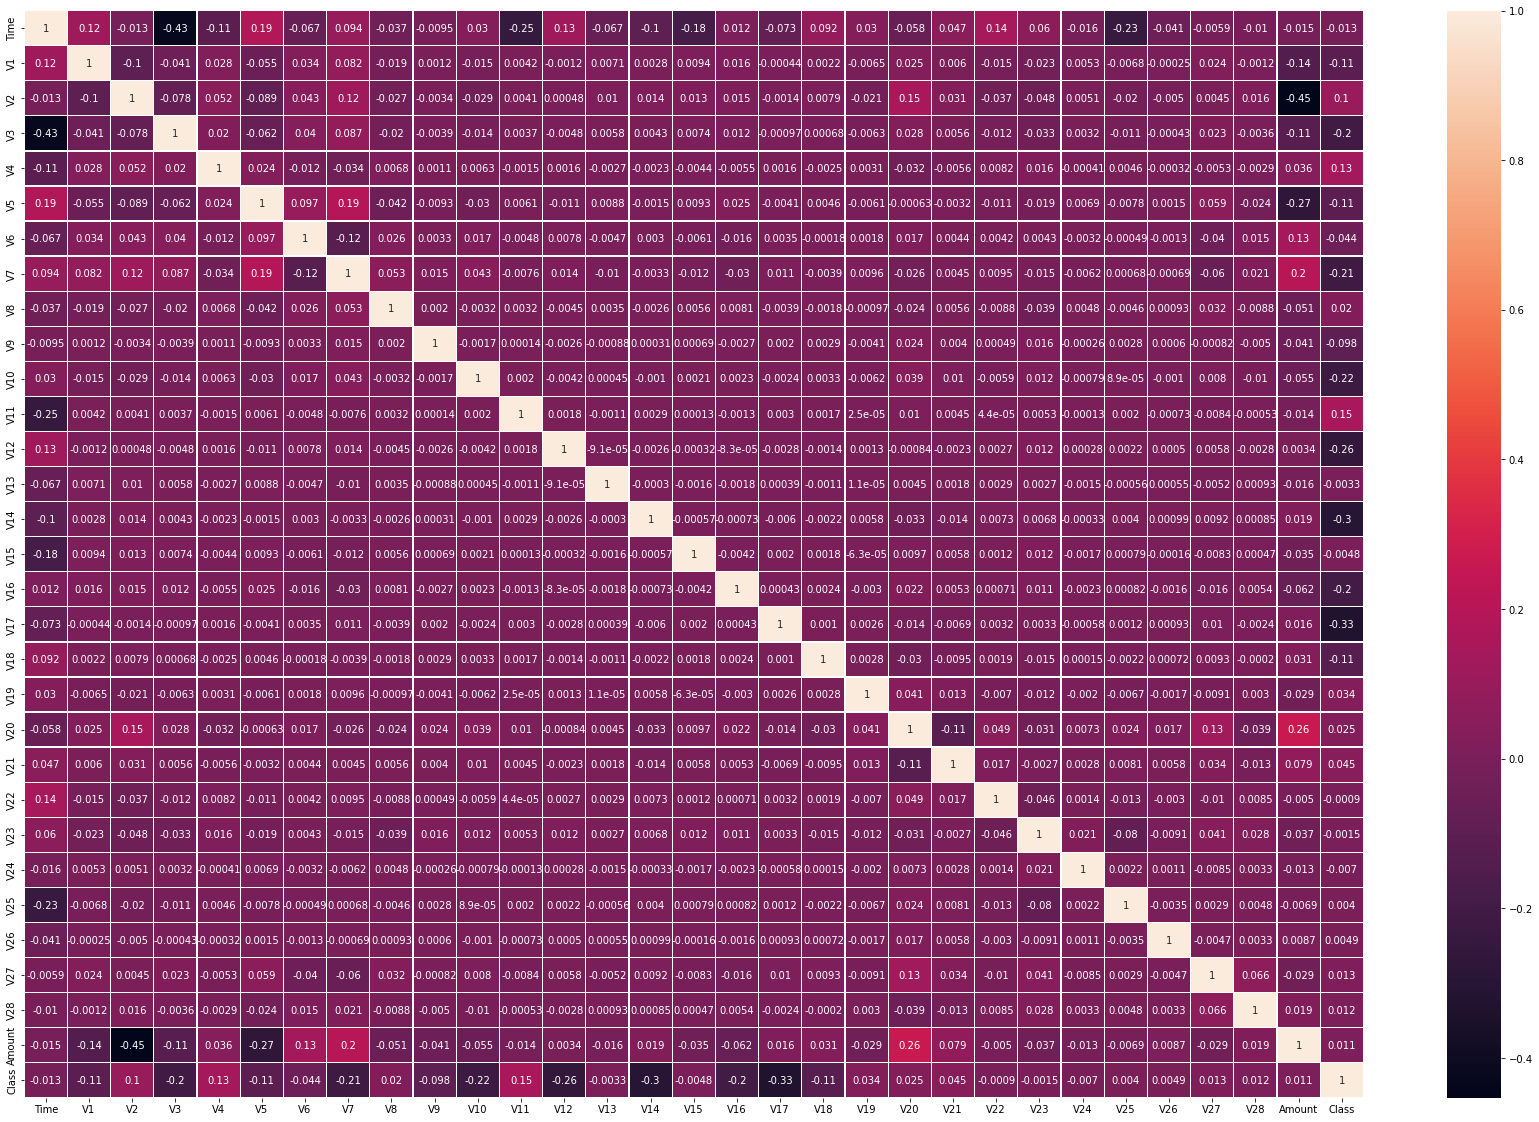

In [ ]:
# Matriz de correlação
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.3)
plt.show()

## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

In [ ]:
# Preparando os dados para classificação
X = test.drop('Class', axis=1)
y = test['Class']

#Balanceando os dados
nm = NearMiss()
X_res, y_res = nm.fit_resample(X,y)

X_train, X_validation, y_train, y_validation = train_test_split(X_res,y_res)

In [ ]:
# Treinando os classificadores
classifiers = [
    ["Logistic Regr.", LogisticRegression(max_iter=1000)],
    ["Decision Tree ", DecisionTreeClassifier(random_state=10)],
    ["Gaussian NB   ", GaussianNB()],
    ["XG Boost      ", XGBClassifier(n_estimators = 100, learning_rate = 0.05)]
]

for alg in classifiers:
  alg[1].fit(X_train, y_train)
  Y_pred = alg[1].predict(X_validation)
  report = classification_report(y_validation, Y_pred)
  print("{} - Report: \n{}".format(alg[0], report))

Logistic Regr. - Report: 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.83      0.90        23

    accuracy                           0.89        37
   macro avg       0.89      0.91      0.89        37
weighted avg       0.92      0.89      0.89        37

Decision Tree  - Report: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.95      0.87      0.91        23

    accuracy                           0.89        37
   macro avg       0.88      0.90      0.89        37
weighted avg       0.90      0.89      0.89        37

Gaussian NB    - Report: 
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.78      0.88        23

    accuracy                           0.86        37
   macro avg       0.87      0.89      0.86       

[Text(0.2944148936170213, 0.9583333333333334, 'X[17] <= -2.75\ngini = 0.003\nsamples = 42721\nvalue = [42647, 74]'),
 Text(0.13617021276595745, 0.875, 'X[4] <= 0.512\ngini = 0.398\nsamples = 73\nvalue = [20, 53]'),
 Text(0.10212765957446808, 0.7916666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.1702127659574468, 0.7916666666666666, 'X[25] <= 1.142\ngini = 0.316\nsamples = 66\nvalue = [13, 53]'),
 Text(0.13617021276595745, 0.7083333333333334, 'X[14] <= -4.045\ngini = 0.248\nsamples = 62\nvalue = [9, 53]'),
 Text(0.06808510638297872, 0.625, 'X[28] <= 0.59\ngini = 0.113\nsamples = 50\nvalue = [3, 47]'),
 Text(0.03404255319148936, 0.5416666666666666, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.10212765957446808, 0.5416666666666666, 'X[0] <= 60987.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.06808510638297872, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.13617021276595745, 0.4583333333333333, 'gini = 0.0\nsamples = 4\nvalue = 

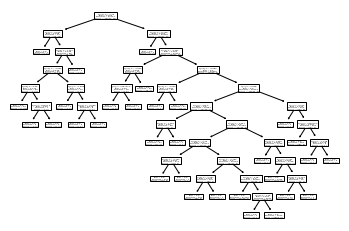

In [ ]:
# Mostrando árvore com dados desbalanceados
classifier = tree.DecisionTreeClassifier(random_state=0)
result = classifier.fit(X, y)
tree.plot_tree(result)

[Text(0.5, 0.9285714285714286, 'X[14] <= -2.351\ngini = 0.5\nsamples = 148\nvalue = [74, 74]'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 65\nvalue = [0, 65]'),
 Text(0.6666666666666666, 0.7857142857142857, 'X[29] <= 173.13\ngini = 0.193\nsamples = 83\nvalue = [74, 9]'),
 Text(0.5, 0.6428571428571429, 'X[0] <= 127383.5\ngini = 0.097\nsamples = 78\nvalue = [74, 4]'),
 Text(0.3333333333333333, 0.5, 'X[19] <= -2.079\ngini = 0.075\nsamples = 77\nvalue = [74, 3]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.35714285714285715, 'X[18] <= 0.833\ngini = 0.051\nsamples = 76\nvalue = [74, 2]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(0.6666666666666666, 0.21428571428571427, 'X[13] <= 0.355\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.07142857142857

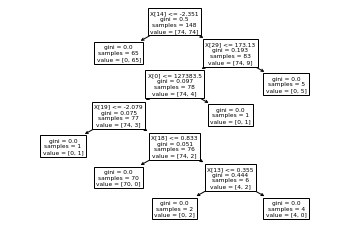

In [ ]:
# Mostrando árvore com dados balanceados
classifier = tree.DecisionTreeClassifier(random_state=0)
result = classifier.fit(X_res, y_res)
tree.plot_tree(result)

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

In [ ]:
'''Em uma primeira análise sem balancear os dados o XG Boost apresentou os melhores resultados em relação aos demais.
Porém agora balanceando os dados com a biblioteca NearMiss todos os 4 algoritmos testados obtiveram resultados melhores
e o Gaussian NB foi o melhor que o Xg Boost.'''

'Em uma primeira análise sem balancear os dados o XG Boost apresentou os melhores resultados em relação aos demais. \nPorém agora balanceando os dados com a biblioteca NearMiss todos os 4 algoritmos testados obtiveram resultados melhores \ne o Gaussian NB foi o melhor que o Xg Boost.'

## Conclusão

* Escrever suas conclusões a respeito da construção do modelo